In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from newspaper import Article

# Getting familiar with the dataset

In [5]:
data_df = pd.read_csv("books.csv", error_bad_lines = False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [6]:
print("Dataset with {} rows, {} columns".format(data_df.shape[0], data_df.shape[1]))

Dataset with 13714 rows, 10 columns


In [7]:
data_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [8]:
data_df['authors'].value_counts().head()

Agatha Christie     69
Stephen King        66
Orson Scott Card    48
Rumiko Takahashi    46
P.G. Wodehouse      42
Name: authors, dtype: int64

# Checking the columns for validity

In [9]:
data_df['average_rating'].unique()

array([4.56, 4.49, 4.47, 4.41, 4.55, 4.78, 3.69, 4.73, 4.38, 4.22, 4.2 ,
       3.43, 3.88, 4.07, 3.9 , 3.83, 3.87, 3.92, 3.94, 4.59, 4.35, 4.53,
       4.5 , 3.61, 3.89, 3.7 , 3.97, 4.33, 3.48, 3.75, 3.6 , 4.17, 3.56,
       3.99, 4.16, 4.43, 3.95, 4.15, 4.24, 3.91, 3.73, 4.45, 3.98, 3.28,
       3.82, 4.  , 3.85, 4.28, 3.31, 3.79, 3.49, 3.5 , 3.62, 3.52, 4.27,
       3.55, 4.09, 4.08, 3.65, 4.04, 2.96, 4.19, 3.96, 3.58, 3.4 , 4.01,
       3.57, 4.11, 3.41, 4.23, 3.77, 3.67, 3.68, 4.63, 4.06, 3.46, 4.02,
       3.78, 4.14, 4.21, 4.1 , 4.13, 3.42, 3.22, 3.64, 4.12, 3.81, 3.8 ,
       3.86, 3.23, 4.4 , 3.93, 3.39, 4.39, 3.84, 3.74, 3.51, 3.72, 3.63,
       3.08, 3.59, 4.03, 0.  , 4.25, 3.71, 3.25, 4.26, 4.57, 4.52, 3.44,
       3.37, 4.71, 4.18, 4.05, 3.16, 3.66, 3.54, 4.36, 4.31, 4.87, 4.48,
       4.34, 4.62, 4.46, 4.3 , 3.76, 2.33, 4.32, 2.95, 3.53, 4.42, 3.45,
       2.67, 3.29, 4.29, 5.  , 2.83, 3.33, 3.  , 4.75, 4.68, 3.36, 4.44,
       4.37, 3.15, 3.38, 3.3 , 3.47, 4.58, 4.54, 3.

In [10]:
data_df['bookID'].unique()

array([    1,     2,     3, ..., 47701, 47708, 47709], dtype=int64)

In [11]:
data_df['# num_pages'].unique()

array([ 652,  870,  320, ..., 3956, 1820,  985], dtype=int64)

In [12]:
data_df['ratings_count'].unique()

array([1944099, 1996446, 5629932, ...,    8710,   14334,    3572],
      dtype=int64)

In [13]:
data_df['text_reviews_count'].unique()

array([26249, 27613, 70390, ...,  2884,   483,  1060], dtype=int64)

## Everything is ok, which means the chosen dataset is good. Now let's search for some trends

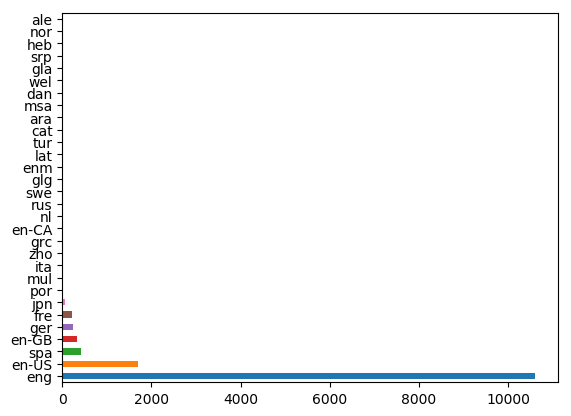

In [14]:
data_df['language_code'].value_counts().plot(kind = 'barh')

In [15]:
data_df['language_code'].value_counts()

eng      10594
en-US     1699
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
nl           7
rus          7
swe          6
glg          4
enm          3
lat          3
tur          3
cat          3
ara          2
msa          1
dan          1
wel          1
gla          1
srp          1
heb          1
nor          1
ale          1
Name: language_code, dtype: int64

In [ ]:
data_df['authors'].value_counts().plot(kind = 'barh')

In [34]:
data_df.average_rating.isnull().value_counts()

False    13714
Name: average_rating, dtype: int64

In [36]:
data_df.dropna(0, inplace=True)


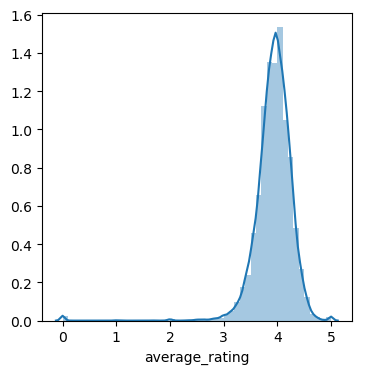

In [43]:
plt.figure(figsize=(4,4))
rating= data_df['average_rating'].astype(float)
sns.distplot(rating)

ValueError: Could not interpret input 'average_rating'

<Figure size 1500x1000 with 0 Axes>

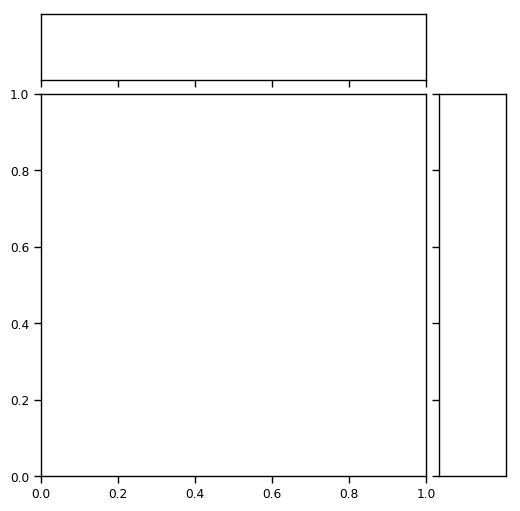

In [49]:
plt.figure(figsize=(15,10))
data_df.dropna(0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x = "average_rating", y = 'text_reviews_count', kind='scatter',  somedata = data_df[['text_reviews_count', 'average_rating']])
ax.set_axis_labels("average_rating", "text_review_count")
plt.show()

In [48]:
data_df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [51]:
trial = data_df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

Wall time: 0 ns


Text(0.5, 1.0, 'Elbow Curve')

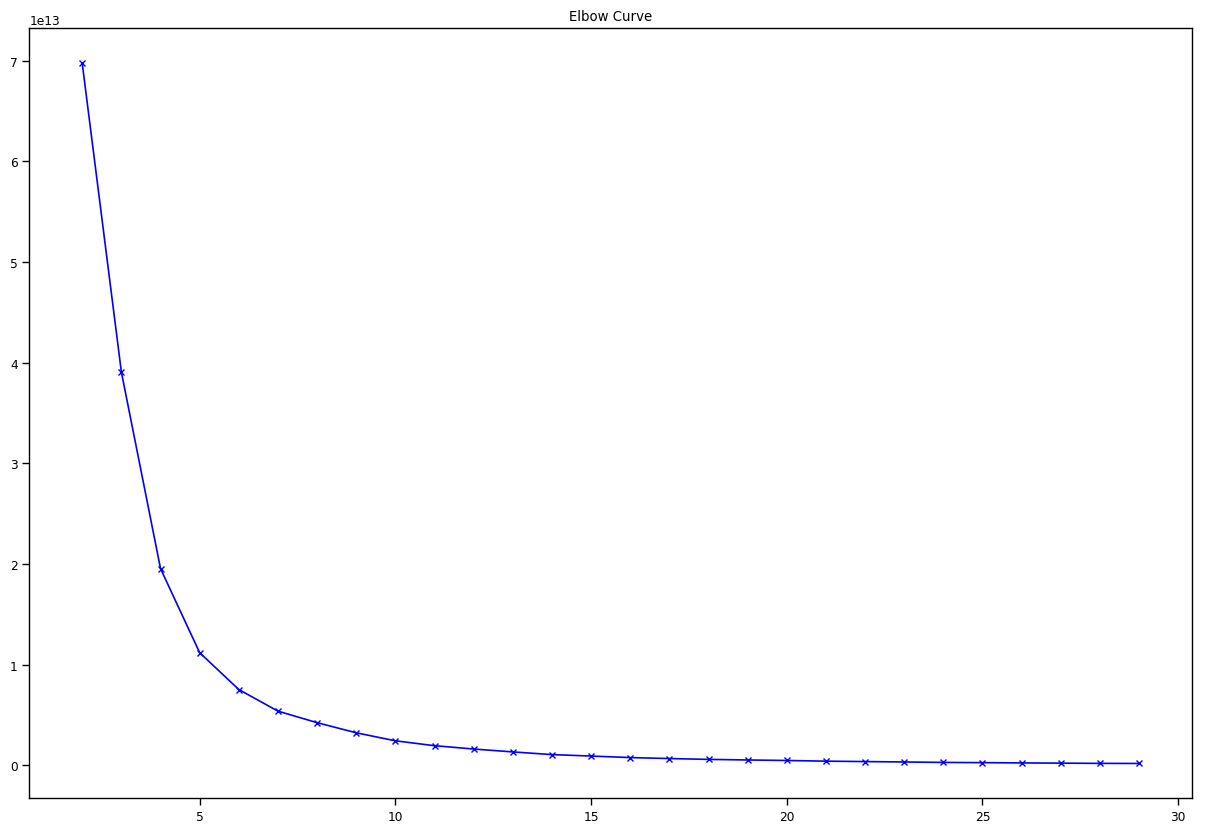

In [53]:
%time
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

In [54]:
trial.idxmax()

average_rating    705
ratings_count       2
dtype: int64

In [202]:
def rating_category(data):
    btw01 = [0] * (data['bookID'].shape[0])
    btw12 = [0] * (data['bookID'].shape[0])
    btw23 = [0] * (data['bookID'].shape[0])
    btw34 = [0] * (data['bookID'].shape[0])
    btw45 = [0] * (data['bookID'].shape[0])
    i = 0
    for rating in data['average_rating']:
        if rating >= 4.0 and rating < 5.0:
            btw45[i] = 1
        elif rating >= 3.0 and rating < 4.0:
            btw34[i] = 1
        elif rating >= 2.0 and rating < 3.0:
            btw23[i] = 1
        elif rating >= 1.0 and rating < 2.0:
            btw12[i] = 1
        elif rating >= 0.0 and rating < 1.0:
            btw01[i] = 1
        i = i + 1
    print(btw45)
    somedatadf = pd.DataFrame(data['average_rating'])
    somedatadf['btw45'] = btw45
    return somedatadf

In [203]:
rating_category(data_df)

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 

,average_rating,btw45
0,4.56,1
1,4.49,1
2,4.47,1
3,4.41,1
4,4.55,1
5,4.78,1
6,3.69,0
7,4.73,1
8,4.38,1
9,4.38,1
